Use an environment that has MNE: https://mne.tools/stable/install/manual_install.html#manual-install

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
#import h5py

from pathlib import Path
import mne

In [24]:
filename = Path('data/human_pupil/MSimTrig_2024_09_25_14_21.asc')
figpath = 'offline_snapshot_figures/'

# load pupil data:
raw_et = mne.io.read_raw_eyelink(filename)
raw_et_df = raw_et.to_data_frame()
interp_et = mne.preprocessing.eyetracking.interpolate_blinks(raw_et, buffer=(0.05, 0.1), interpolate_gaze=True)
interp_et_df = interp_et.to_data_frame()

# find the channels, these may be left or right eye
pupil_chan = [c for c in interp_et_df.columns if 'pupil' in c][0]
x_chan = [c for c in interp_et_df.columns if 'x' in c][0]
y_chan = [c for c in interp_et_df.columns if 'y' in c][0]

# get raw annotations
annot = raw_et.annotations.to_data_frame()
annot['onset'] = raw_et.annotations.onset
annot.head(n=100)

Loading /Users/anneurai/Documents/code/int-brain-lab/human_ibl_snapshots/data/human_pupil/MSimTrig_2024_09_25_14_21.asc
Pixel coordinate data detected.Pass `scalings=dict(eyegaze=1e3)` when using plot method to make traces more legible.
Pupil-size area detected.
No saccades were found in this file. Not returning any info on saccades.
No blinks were found in this file. Not returning any info on blinks.


/var/folders/kx/l2qs4np17yxg18pk2nm85pqm0000gn/T/ipykernel_2363/3774890167.py:7: RuntimeWarning: No annotations matching ['BAD_blink'] found. Aborting.
  interp_et = mne.preprocessing.eyetracking.interpolate_blinks(raw_et, buffer=(0.05, 0.1), interpolate_gaze=True)


,onset,duration,description,ch_names
0,0.004,72.388,fixation,"(xpos_right, ypos_right, pupil_right)"
1,0.106,0.000,EYE_USED 1 RIGHT,()
2,0.169,0.000,fix_cross_ONSET,()
3,0.788,0.000,0 dot_ONSET,()
4,0.788,0.000,0 grating_r_ONSET,()
...,...,...,...,...
95,12.954,0.000,0 grating_l_ONSET,()
96,12.954,0.000,signed_contrast 0.00,()
97,12.954,0.000,stimOn,()
98,12.954,0.000,sound_trial_start_ONSET,()


['-3 dot_OFFSET', '-3 grating_l_OFFSET', '-3 grating_r_OFFSET', '0 dot_ONSET', '0 grating_l_ONSET', '0 grating_r_ONSET', 'EYE_USED 1 RIGHT', 'TRIALID 10', 'TRIALID 2', 'TRIALID 3', 'TRIALID 4', 'TRIALID 5', 'TRIALID 6', 'TRIALID 7', 'TRIALID 8', 'TRIALID 9', 'TRIAL_RESULT 0', 'block_break end', 'dot_OFFSET', 'feedback 0', 'feedback 1', 'feedback NaN', 'feedback_sound_OFFSET', 'feedback_sound_ONSET', 'fix_cross_ONSET', 'fixation', 'grating_l_OFFSET', 'grating_r_OFFSET', 'moveInit', 'response -1', 'response 1', 'signed_contrast -0.02', 'signed_contrast -0.05', 'signed_contrast -0.10', 'signed_contrast -0.20', 'signed_contrast 0.00', 'signed_contrast 0.02', 'signed_contrast 0.05', 'sound_no_resp_ONSET', 'sound_trial_start_OFFSET', 'sound_trial_start_ONSET', 'stimOn', 'timeout']


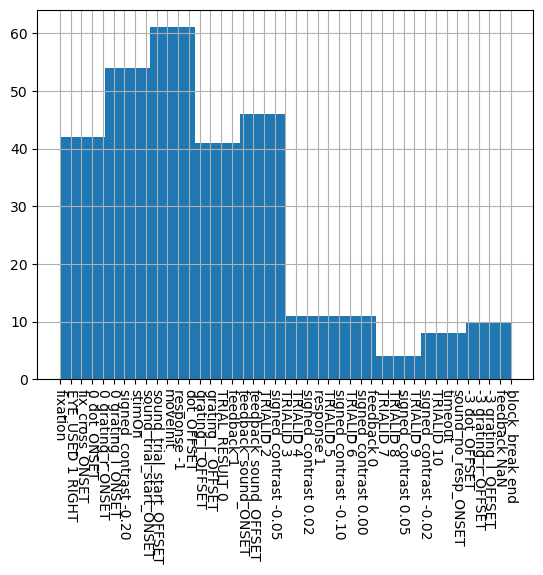

In [9]:
annot['description'].hist(xrot=-90)
all_annot = sorted(annot['description'].unique())
print(all_annot)


In [12]:
# lock to stimulus onset, response and feedback

# get events
stim_events_dict = {"signed_contrast -0.02": -0.02, "signed_contrast -0.05": -0.05, "signed_contrast -0.10": -0.10, 
                    "signed_contrast -0.20": -0.20, "signed_contrast 0.00": 0.00, "signed_contrast 0.02": 0.02, "signed_contrast 0.05": 0.05,
                    "signed_contrast 0.10": 0.10, "signed_contrast 0.20": 0.20}
events, _ = mne.events_from_annotations(raw_et, event_id=stim_events_dict)
epochs = mne.Epochs(interp_et, events,  tmin=-1, tmax=3, baseline=None, preload=True, reject=None)   
stim_epochs_df = epochs.to_data_frame()

response_events_dict = {"response 1":1, "response -1":-1}
events, _ = mne.events_from_annotations(raw_et, event_id=response_events_dict)
epochs = mne.Epochs(interp_et, events,  tmin=-1, tmax=3, baseline=None, preload=True, reject=None)   
resp_epochs_df = epochs.to_data_frame()

feedback_events_dict = {"feedback 1":1, "feedback 0":0}
events, _ = mne.events_from_annotations(raw_et, event_id=feedback_events_dict)
epochs = mne.Epochs(interp_et, events,  tmin=-1, tmax=3, baseline=None, preload=True, reject=None)   
fb_epochs_df = epochs.to_data_frame()

Used Annotations descriptions: ['signed_contrast -0.02', 'signed_contrast -0.05', 'signed_contrast -0.10', 'signed_contrast -0.20', 'signed_contrast 0.00', 'signed_contrast 0.02', 'signed_contrast 0.05']
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 20 events and 2001 original time points ...
2 bad epochs dropped
Used Annotations descriptions: ['response -1', 'response 1']
Not setting metadata
18 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 18 events and 2001 original time points ...
1 bad epochs dropped
Used Annotations descriptions: ['feedback 0', 'feedback 1']
Not setting metadata
18 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 18 events and 2001 original time points ...
1 bad epochs dropped


In [14]:
epochs.drop_log

((),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 ('TOO_SHORT',))

/var/folders/kx/l2qs4np17yxg18pk2nm85pqm0000gn/T/ipykernel_2363/3949944164.py:34: UserWarning: The figure layout has changed to tight
  fig.tight_layout(rect=[0, 0.03, 1, 0.95])


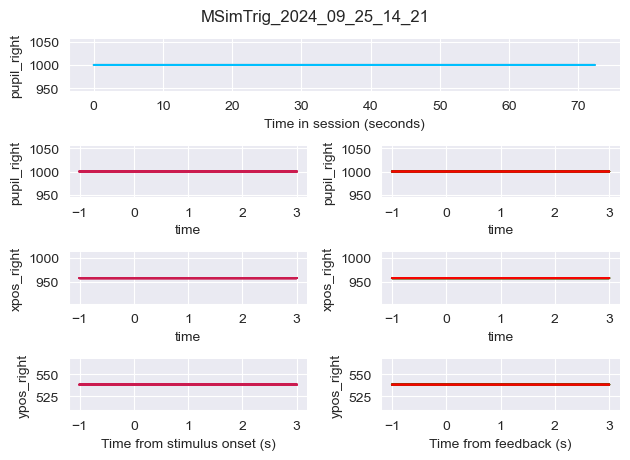

In [26]:
# make a snapshot figure
sns.set_style('darkgrid')
fig, axes = plt.subplot_mosaic([['a', 'a'], ['b', 'c'], ['d', 'e'], ['f', 'g']],
                              layout='constrained', figsize=(12,8))

#sns.lineplot(, x='time', y='pupil_left')
sns.lineplot(raw_et_df, x='time', y=pupil_chan, color='darkgrey', ax=axes['a'])
sns.lineplot(interp_et_df, x='time', y=pupil_chan, color='deepskyblue', ax=axes['a'])
axes['a'].set_xlabel('Time in session (seconds)')

# stimulus-locked pupil
for axn, var in zip(['b', 'd', 'f'], [pupil_chan, x_chan, y_chan]):
    sns.lineplot(data=stim_epochs_df, x='time', y=var, estimator=None, 
                 hue='condition', palette='rocket', alpha=0.5,
                 legend=False,
                 units='epoch', ax=axes[axn])

for axn, var in zip(['c', 'e', 'g'], [pupil_chan, x_chan, y_chan]):
    sns.lineplot(data=fb_epochs_df, x='time', y=var, estimator=None, 
                 hue='condition', legend=False, alpha=0.5,
                 palette=['green', 'red'], hue_order=['1','0'],
                 units='epoch', ax=axes[axn])

# link some axes
axes['b'].sharex(axes['d'])
axes['d'].sharex(axes['f'])
axes['f'].set_xlabel('Time from stimulus onset (s)')

axes['c'].sharex(axes['e'])
axes['e'].sharex(axes['g'])
axes['g'].set_xlabel('Time from feedback (s)')

sns.despine()
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

figname = os.path.split(filename)[1].split('.asc')[0]
fig.suptitle(figname)
fig.savefig(str(figpath) + 'pupil_' + figname + '.png')

In [22]:
figpath.strpath

AttributeError: 'PosixPath' object has no attribute 'strpath'